# Setup


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from networkx.generators.random_graphs import (
    connected_watts_strogatz_graph, erdos_renyi_graph
)

In [2]:
from sir_model import ProximityModel, NetworkModel, indicator
from test_model import generate_scatterplot
from inference_model import MeanField, DynamicMessagePassing

# Erdos Renyi

## Model

Name: 
Type: Graph
Number of nodes: 400
Number of edges: 1687
Average degree:   8.4350
expected number of contacts 4.2
Generating transmissions
Running simulation
t = 0 / 100


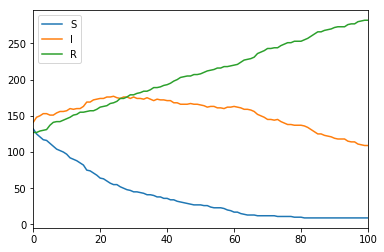

In [3]:
N = 400
proba_contact = 0.5
graph = erdos_renyi_graph(n=N, p=0.02)
layout = nx.random_layout(graph)
print(nx.info(graph))

initial_states = np.random.randint(3, size=N)
model =  NetworkModel(
    graph=graph, mu=0.01, lamb=0.02, proba_contact=proba_contact, 
    layout=layout, initial_states=initial_states
)
print("expected number of contacts %.1f" % model.n_contacts)
model.run(100, print_every=200)
model.get_counts().plot();

## Check inference

n = 0 / 500
n = 100 / 500
n = 200 / 500
n = 300 / 500
n = 400 / 500
run times from 2.6e-03s to 8.6e-03s median 2.7e-03s


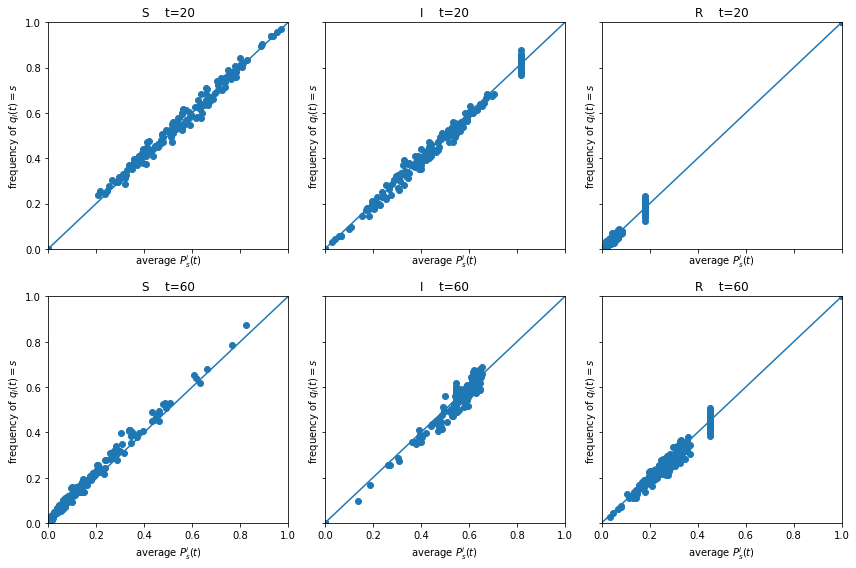

In [4]:
initial_probas = indicator(model.initial_states)
infer = MeanField(initial_probas, model.x_pos, model.y_pos)
generate_scatterplot(model, infer, 500, [20, 60])

n = 0 / 500
n = 100 / 500
n = 200 / 500
n = 300 / 500
n = 400 / 500
run times from 3.3e-01s to 7.5e-01s median 3.4e-01s


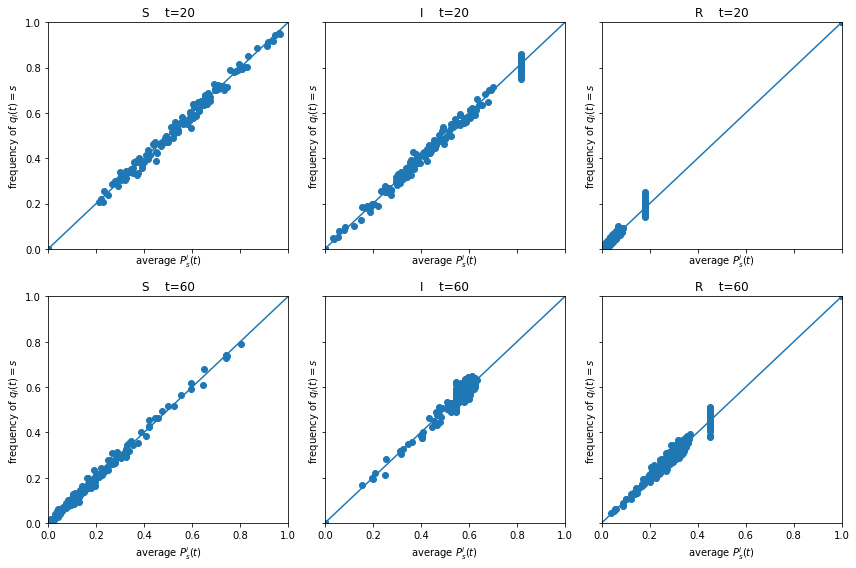

In [5]:
initial_probas = indicator(model.initial_states)
infer = DynamicMessagePassing(initial_probas, model.x_pos, model.y_pos)
generate_scatterplot(model, infer, 500, [20, 60])

# Random geometric

## Model

expected number of contacts 5.5
Generating transmissions
Running simulation
t = 0 / 100


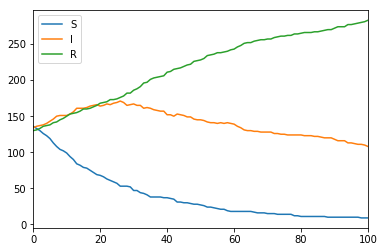

In [6]:
N = 400
initial_states = np.random.randint(3, size=N)
model =  ProximityModel(
    N=N, mu=0.01, lamb=0.02, scale=1.0,
    initial_states=initial_states
)
print("expected number of contacts %.1f" % model.n_contacts)
model.run(100, print_every=200)
model.get_counts().plot();

## Check inference

n = 0 / 500
n = 100 / 500
n = 200 / 500
n = 300 / 500
n = 400 / 500
run times from 1.4e-03s to 4.8e-03s median 1.4e-03s


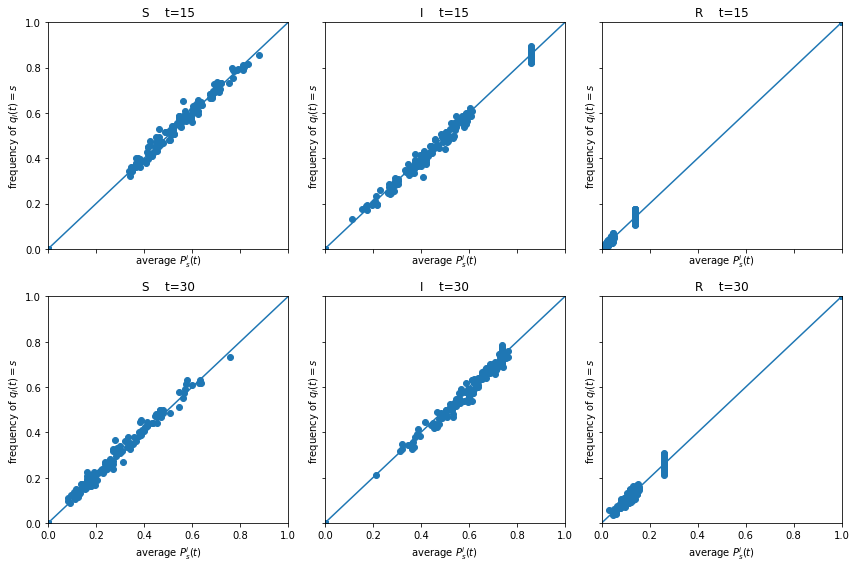

In [7]:
initial_probas = indicator(model.initial_states)
infer = MeanField(initial_probas, model.x_pos, model.y_pos)
generate_scatterplot(model, infer, 500, [15, 30])

n = 0 / 500
n = 100 / 500
n = 200 / 500
n = 300 / 500
n = 400 / 500
run times from 2.2e-01s to 4.5e-01s median 2.3e-01s


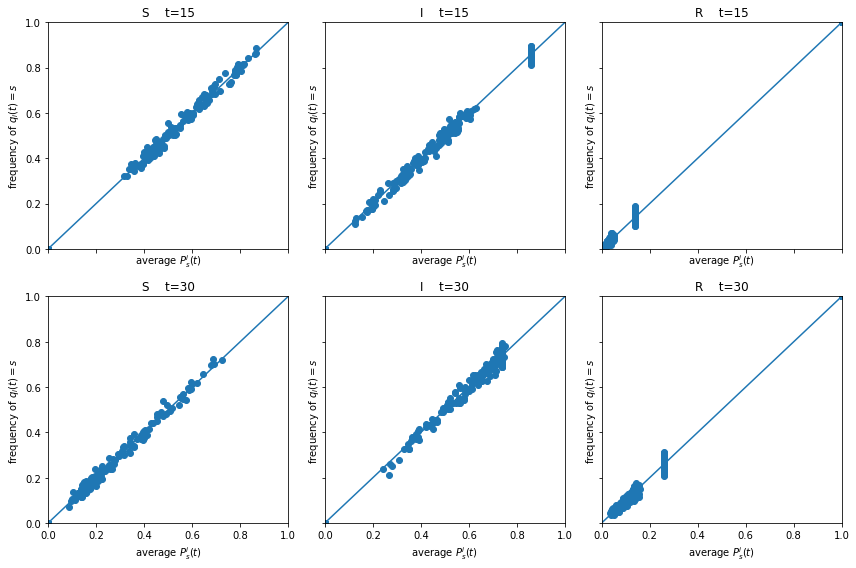

In [8]:
initial_probas = indicator(model.initial_states)
infer = DynamicMessagePassing(initial_probas, model.x_pos, model.y_pos)
generate_scatterplot(model, infer, 500, [15, 30])